<a href="https://colab.research.google.com/github/solharsh/NLP_With_ML/blob/master/KNN_Classifier_Predicting_Human_Safety_Tag_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K Nearest Neighbors Model for the Product Safety Dataset

In this notebook, I will be using the K Nearest Neighbors method to build a classifier to predict the predict the human_tag field of the dataset.

In [0]:
import pandas as pd
import os

In [0]:
train_df = pd.read_csv(r"/content/training(1).csv",encoding='utf-8', header=0)

In [19]:
train_df.head()

,ID,doc_id,text,date,star_rating,title,human_tag
0,47490,15808037321,"I ordered a sample of the Dietspotlight Burn, ...",6/25/2018 17:51,1,DO NOT BUY!,0
1,16127,16042300811,This coffee tasts terrible as if it got burnt ...,2/8/2018 15:59,2,Coffee not good,0
2,51499,16246716471,I've been buying lightly salted Planters cashe...,3/22/2018 17:53,2,"Poor Quality - Burnt, Shriveled Nuts With Blac...",0
3,36725,14460351031,This product is great in so many ways. It goes...,12/7/2017 8:49,4,"Very lovey product, good sunscreen, but strong...",0
4,49041,15509997211,"My skin did not agree with this product, it wo...",3/21/2018 13:51,1,Not for everyone. Reactions can be harsh.,1


In [20]:
test_df = pd.read_csv(r"/content/public_test_features(1).csv",encoding='utf-8',header=0)
test_df.head()

,ID,doc_id,text,date,star_rating,title
0,62199,15449606311,"Quality of material is great, however, the bac...",3/7/2018 19:47,3,great backpack with strange fit
1,76123,15307152511,The product was okay but wasn't refined campho...,43135.875,2,Not refined
2,78742,12762748321,I normally read the reviews before buying some...,42997.37708,1,"Doesnt work, wouldnt recommend"
3,64010,15936405041,These pads are completely worthless. The light...,43313.25417,1,The lighter colored side of the pads smells li...
4,17058,13596875291,The saw works great but the blade oiler does n...,12/5/2017 20:17,2,The saw works great but the blade oiler does n...


In [21]:
print(train_df.isna().sum())
print(test_df.isna().sum())

ID             0
doc_id         0
text           6
date           0
star_rating    0
title          1
human_tag      0
dtype: int64
ID             0
doc_id         0
text           2
date           0
star_rating    0
title          1
dtype: int64


In [0]:
#Let's fill-in the missing values for text below. We will just use the placeholder "Missing" here.

train_df['text'].fillna("Missing", inplace=True)
test_df['text'].fillna("Missing", inplace=True)
train_df['title'].fillna("Missing", inplace=True)
test_df['title'].fillna("Missing", inplace=True)

In [23]:
#Now, it is time to process the text fields. We will remove stop words and apply stemming.

print('The shape of the training dataset is:', train_df.shape)
print('The shape of the test dataset is:', test_df.shape)

The shape of the training dataset is: (63134, 7)
The shape of the test dataset is: (15784, 6)


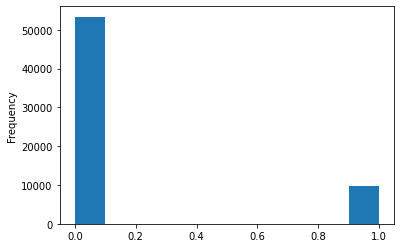

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

train_df["human_tag"].plot.hist()
plt.show()

Most of the values for the human tag are False. Meaning, they were identified as safe.

In [25]:
# Install the library and functions
import nltk

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
import nltk, re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

In [27]:
stop = stopwords.words("english")
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [0]:
# These words are important for our problem. We don't want to remove them.
excluding = ['against', 'not', 'don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't",
             'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 
             'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't",
             'needn', "needn't",'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', 
             "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [0]:
# New stop word list
stop_words = [word for word in stop if word not in excluding]

In [30]:
print(len(stop_words))
print(len(stop))

142
179


In [0]:
snow = SnowballStemmer('english')

In [0]:
def process_text(texts): 
    final_text_list=[]
    for sent in texts:
        filtered_sentence=[]
        
        sent = sent.lower() # Lowercase 
        sent = sent.strip() # Remove leading/trailing whitespace
        sent = re.sub('\s+', ' ', sent) # Remove extra space and tabs
        sent = re.compile('<.*?>').sub('', sent) # Remove HTML tags/markups:
        
        for w in word_tokenize(sent):
            # We are applying some custom filtering here.
            # Check if it is not numeric and its length>2 and not in stop words
            if(not w.isnumeric()) and (len(w)>2) and (w not in stop_words):  
                # Stem and add to filtered list
                filtered_sentence.append(snow.stem(w))
        final_string = " ".join(filtered_sentence) #final string of cleaned words
 
        final_text_list.append(final_string)
    
    return final_text_list

In [33]:
print("Pre-processing the training text field")
train_df["text"] = process_text(train_df["text"].tolist()) 
print("Pre-processing the test text field")
test_df["text"] = process_text(test_df["text"].tolist())

Pre-processing the training text field
Pre-processing the test text field


We will apply min-max scaling to our rating field so that they will be between 0-1. Note that for scalling the validation and test set we are using the same min and max values computed on the training set!

In [0]:
train_df["star_rating"] = (train_df["star_rating"] - train_df["star_rating"].min())/(train_df["star_rating"].max()-train_df["star_rating"].min())
test_df["star_rating"] = (test_df["star_rating"] - test_df["star_rating"].min())/(test_df["star_rating"].max()-test_df["star_rating"].min())

In [0]:
from sklearn.model_selection import train_test_split
 
# Input: "text", "star_rating"
# Target: "human_tag"
X_train, X_val, y_train, y_val = train_test_split(train_df[["text", "star_rating"]],
                                                  train_df["human_tag"].tolist(),
                                                  test_size=0.10,
                                                  shuffle=True)

In [0]:
#Let's get our binary vectors for the text field

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
 
# Initialize the binary count vectorizer
tfidf_vectorizer = CountVectorizer(binary=True,
                                   max_features=200    # Limit the vocabulary size
                                  )
# Fit and transform
X_train_text_vectors = tfidf_vectorizer.fit_transform(X_train["text"].tolist())
# Only transform
X_val_text_vectors = tfidf_vectorizer.transform(X_val["text"].tolist())

In [38]:
print(tfidf_vectorizer.vocabulary_)

{'say': 151, 'take': 172, 'burnt': 20, 'thing': 175, 'still': 169, 'not': 113, 'smell': 162, 'nice': 112, 'small': 161, 'get': 58, 'realli': 139, 'quick': 135, 'work': 196, 'well': 193, 'bit': 14, 'expect': 46, 'hope': 73, 'could': 31, 'enough': 42, 'notic': 115, 'plastic': 126, 'first': 54, 'start': 166, 'remov': 144, 'put': 133, 'high': 71, 'coupl': 32, 'day': 33, 'better': 12, 'got': 62, 'run': 149, 'without': 195, 'left': 86, 'come': 28, 'back': 9, 'even': 43, 'use': 185, 'worth': 197, 'almost': 2, 'mayb': 102, 'it': 80, 'cheap': 25, 'tri': 182, 'buy': 21, 'someth': 164, 'amazon': 4, 'reason': 140, 'end': 41, 'though': 177, 'bought': 16, 'oil': 116, 'easili': 40, 'return': 146, 'great': 63, 'piec': 124, 'complet': 29, 'turn': 183, 'hour': 75, 'quit': 136, 'place': 125, 'ever': 44, 'sinc': 158, 're': 137, 'like': 90, 'recommend': 142, 'pretti': 127, 'good': 61, 'differ': 36, 'one': 118, 'insid': 78, 'burn': 19, 'also': 3, 'heat': 69, 'leav': 85, 'dri': 38, 'way': 191, 'make': 99, 't

#Fitting the KNN classifier.

In [0]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [40]:
# Let' merge our features
X_train_features = np.column_stack((X_train_text_vectors.toarray(), 
                                    X_train["star_rating"].values)
                                  )
# Let' merge our features
X_val_features = np.column_stack((X_val_text_vectors.toarray(), 
                                    X_val["star_rating"].values)
                                  )
 
K_values = [3, 5, 10, 20, 30]
 
for K in K_values:
    knnClassifier = KNeighborsClassifier(n_neighbors=K)
    knnClassifier.fit(X_train_features, y_train)
    val_predictions = knnClassifier.predict(X_val_features)
    print("F1 Score for K:", K, "is", f1_score(y_val, val_predictions))

F1 Score for K: 3 is 0.31451612903225806
F1 Score for K: 5 is 0.2952076677316294
F1 Score for K: 10 is 0.1953562850280224
F1 Score for K: 20 is 0.19259259259259257
F1 Score for K: 30 is 0.144702842377261


#Make predictions on test dataset

In [0]:
#Here, we will pick the best performing model from above. K=3 yields the best result, we will use it.

# Get binary features for the test text field
X_test_text_vectors = tfidf_vectorizer.transform(test_df["text"].tolist())
 
# Let's merge the fields of interest
X_test_features = np.column_stack((X_test_text_vectors.toarray(), 
                                  test_df["star_rating"].values)
                                  )
 
# Fitting the classifier first
knnClassifier = KNeighborsClassifier(n_neighbors=3)
knnClassifier.fit(X_train_features, y_train)
 
# Predicting on test features
test_predictions = knnClassifier.predict(X_test_features)

In [44]:
print(test_df["text"][13])
print('______________________________')
print(test_df["text"][27])
print('______________________________')

inaccur ... put oven set 350f minut still read went increas oven temperatur reach complet burn food bake
______________________________
volum low not worth buy left long heat start burn speaker touch
______________________________


In [0]:
#This was predicted as not safe by our model. That's great! It seems to have predicted correctly.

In [46]:
print(test_df["text"][44])
print('______________________________')

would like say light bright wish would send new ine due half light work n't even longer enough enjoy pleas help send photo like light burn
______________________________


In [0]:
#However, it is not perfect yet as the above review was marked incorrectly as not safe.